# Imports

In [ ]:
import pickle
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset

In [ ]:
url = '/content/drive/My Drive/Data Files/fetal_health.csv'
df = pd.read_csv(url)

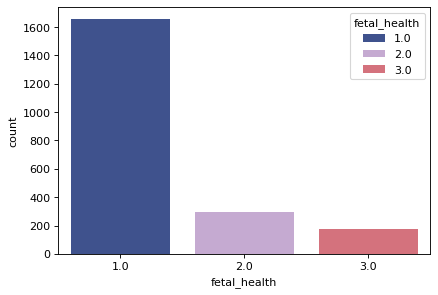

In [ ]:
colours=["#324B9A","#C7A3D7", "#E46270"]
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(data=df, x="fetal_health",palette=colours, hue="fetal_health")
plt.savefig('/content/drive/My Drive/Data Files/data_base.png')

In [ ]:
with open("/content/drive/My Drive/Data Files/result_genetic_alg.txt", "rb") as fp:
  genetic_alg = pickle.load(fp)

with open("/content/drive/My Drive/Data Files/result_initial_generation.txt", "rb") as fp:
  initial_population = pickle.load(fp)

with open("/content/drive/My Drive/Data Files/best_indivs.txt", "rb") as fp:
  best_indivs = pickle.load(fp)

# Scripts

In [ ]:
def best_of_each_generation(generation):
  fitness = float('inf')
  best_indiv = []

  for i in generation:
    if i[0] < fitness:
      fitness = i[0]
      best_indiv = i

  return best_indiv

In [ ]:
def evaluation(genetic_alg,reference):
  indiv = best_of_each_generation(genetic_alg)
  fitness = indiv[0]

  x = df[df.columns.difference(['fetal_health'])]
  y = df[['fetal_health']]

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
  x_train = np.array(x_train)
  x_test = np.array(x_test)
  y_train = np.ravel(y_train)
  y_test = np.array(y_test)

  model = models[indiv[1][0]]
  ind = [i==0 for i in indiv[1][1:]]
  model.fit(x_train[:,ind],y_train)
  y_pred = model.predict(x_test[:,ind])
  accuracy = accuracy_score(y_test,y_pred)

  print('--------------- RESULTADO {} --------------- '.format(reference))
  print('Melhor individuo: {} \nQtd. de atributos: {} \nFitness: {} \nAcurácia: {}'.format(indiv[1],np.sum(indiv[1:]),fitness,accuracy))

#Results

In [ ]:
models = [DecisionTreeClassifier(max_depth=4),
          DecisionTreeClassifier(max_depth=6),
          DecisionTreeClassifier(max_depth=8),
          RandomForestClassifier(max_depth=14),
          RandomForestClassifier(max_depth=16),
          RandomForestClassifier(max_depth=20)]

In [ ]:
evaluation(initial_population, 'PRIMEIRA GERAÇÃO')

--------------- RESULTADO PRIMEIRA GERAÇÃO --------------- 
Melhor individuo: [4, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, True, False, False] 
Qtd. de atributos: 9 
Fitness: 12.918075824648959 
Acurácia: 0.9153605015673981


In [ ]:
evaluation(genetic_alg, 'ALGORITMO GENÉTICO')

--------------- RESULTADO ALGORITMO GENÉTICO --------------- 
Melhor individuo: [2, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False] 
Qtd. de atributos: 5 
Fitness: 10.717585666945705 
Acurácia: 0.8996865203761756


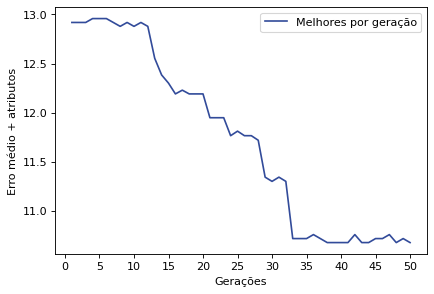

In [ ]:
y = [best[0] for best in best_indivs]
x = list(range(1, 51))
z = [best[0] for best in genetic_alg]

figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, color='#324B9A')
plt.xticks(range(0,51,5))
plt.xlabel('Gerações')
plt.ylabel('Erro médio + atributos')
plt.legend(['Melhores por geração'])
plt.rcParams.update({'font.size': 10})
plt.savefig('/content/drive/My Drive/Data Files/bests_in_generation.png')

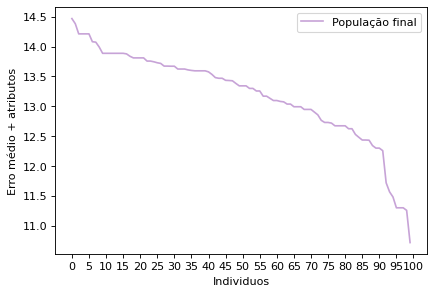

In [ ]:
result = [best[0] for best in genetic_alg]
result.sort(reverse=True)

plt.rcParams.update({'font.size': 10})
figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(result,'-', color='#C7A3D7')

plt.xticks(range(0,105,5))
plt.xlabel('Individuos')
plt.ylabel('Erro médio + atributos')
plt.legend(['População final'])
plt.savefig('/content/drive/My Drive/Data Files/final_population.png')